In [9]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
api_url = "https://services1.arcgis.com/ceiitspzDAHrdGO1/arcgis/rest/services/Fall_2023_MBTA_Rail_Ridership_Data_by_SDP_Time_Period_Route_Line_and_Stop/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

response = requests.get(api_url)
data = response.json()

features = data['features']
records = [feature['properties'] for feature in features]
df = pd.DataFrame(records)
early_am_data = df[(df['route_id'].isin(['Blue', 'Orange'])) & (df['time_period_name'] == 'EARLY_AM')]
grouped_data = early_am_data.groupby(['stop_name', 'route_id'])['total_ons'].sum().unstack()


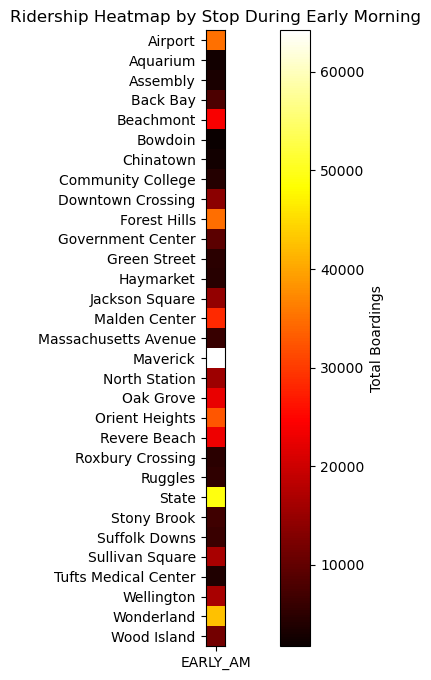

In [19]:
pivot_data = early_am_data.pivot_table(values='total_ons', index='stop_name', columns='time_period_name', aggfunc='sum')

plt.figure(figsize=(14, 8))
plt.imshow(pivot_data, cmap='hot')
plt.colorbar(label='Total Boardings')
plt.xticks(range(len(pivot_data.columns)), pivot_data.columns)
plt.yticks(range(len(pivot_data.index)), pivot_data.index)
plt.title('Ridership Heatmap by Stop During Early Morning')
plt.show()